In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from fnsa.classifier.data import load as load_data
from fnsa.classifier.util import cross_validate, evaluate, plot_confusion_matrix

from sklearn.externals import joblib

In [40]:
from fnsa.feature import FeatureExtractor, VERY_STRICT_F_TYPE, STRICT_F_TYPE, REGULAR_F_TYPE, FLUSH_F_TYPE
from fnsa.lexicon import Lexicon
from fnsa.scope import DRScopeDetector, IFScopeDetector
#from fnsa.graph import make_graph
from fnsa.util import *
from fnsa.classifier.util import evaluate, fit, split
import spacy

In [60]:
ftype = VERY_STRICT_F_TYPE
#ftype = STRICT_F_TYPE
#ftype = REGULAR_F_TYPE
#ftype = FLUSH_F_TYPE
nlp = spacy.load('en_core_web_sm')
lexicon = Lexicon(nlp)
dr_detector = DRScopeDetector()
if_detector = IFScopeDetector()
extractor = FeatureExtractor(lexicon, detectors=[dr_detector, if_detector], ftype=ftype)

Accuracy = 0.845.


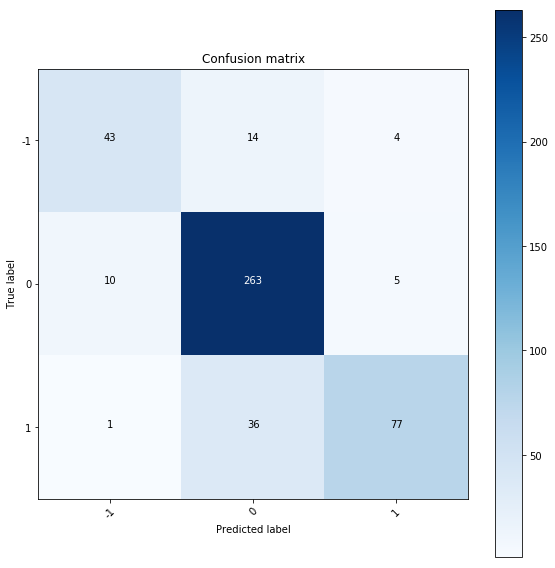

In [63]:
fname = 'all-agree-%d' % ftype
model = 'nb'
codes = [-1, 0, 1]
code2sentiment = {-1:'-', 0:'=', 1:'+'}

sentences, X, y = load_data(fname + ".tsv")
sentences_train, X_train, y_train, sentences_test, X_test, y_test = split(sentences, X, y)
classifier = fit(X_train, y_train)
accuracy, cm = evaluate(classifier, X_test, y_test)
plot_confusion_matrix(cm, codes)
print("Accuracy = %0.3f." % (accuracy,))

In [64]:
def important_features(classifier, n=20):
    vectorizer = classifier.named_steps['vectorizer']
    transformer = classifier.named_steps['transformer'] 
    estimator = classifier.named_steps['estimator'] 
    class_labels = estimator.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class_negative = sorted(zip(estimator.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class_neutral = sorted(zip(estimator.feature_count_[1], feature_names),reverse=True)[:n]
    topn_class_positive = sorted(zip(estimator.feature_count_[2], feature_names),reverse=True)[:n]
    print("Important phrases in negative sentences\n")
    for coef, feat in topn_class_negative:
        print("[-] %6.2f: %s" % (coef, feat)) 
    print("-----------------------------------------\n")
    
    print("Important phrases in neutral sentences\n")
    for coef, feat in topn_class_neutral:
        print("[=] %6.2f: %s" % (coef, feat)) 

    print("-----------------------------------------\n")
    print("Important phrases in positive sentences\n")
    for coef, feat in topn_class_positive:
        print("[+] %6.2f: %s" % (coef, feat)) 

important_features(classifier, n=15)

Important phrases in negative sentences

[-] 125.78: fe_+_-_=
[-]  42.00: fi_=_=
[-]  24.56: lm_-_=
[-]   7.87: fe_-_+_=
[-]   7.45: lm_+_=
[-]   6.89: fe_-_-_=
[-]   6.06: fe_+_-_= lm_-_=
[-]   4.54: fe_+_-_rev
[-]   4.39: fe_+_-_= fe_+_-_=
[-]   4.14: lm_-_= lm_-_=
[-]   3.76: fe_+_-_= lm_+_=
[-]   3.73: lm_+_= fe_+_-_=
[-]   2.91: lm_+_rev
[-]   2.60: lm_-_= lm_+_=
[-]   2.42: fe_+_+_=
-----------------------------------------

Important phrases in neutral sentences

[=] 634.00: fi_=_=
[=] 245.53: lm_+_=
[=] 100.97: lm_-_=
[=]  33.39: lm_+_= lm_+_=
[=]  29.96: fe_+_+_=
[=]  25.11: lm_-_rev
[=]  18.06: fe_+_-_=
[=]  11.11: lm_+_= lm_-_=
[=]   8.32: lm_+_mod
[=]   7.58: lm_+_= fe_+_+_=
[=]   5.01: lm_-_= lm_+_=
[=]   4.69: fe_+_+_= lm_+_=
[=]   4.65: lm_-_= lm_-_=
[=]   4.04: lm_+_rev
[=]   3.00: lm_+_lit
-----------------------------------------

Important phrases in positive sentences

[+] 245.60: fe_+_+_=
[+]  61.45: lm_+_=
[+]  50.00: fi_=_=
[+]  22.41: lm_+_= lm_+_=
[+]  16.88: f

In [37]:
vectorizer = classifier.named_steps['vectorizer']
vectorizer.get_feature_names()

['fe_+_+_=',
 'fe_+_+_= fe_+_+_=',
 'fe_+_+_= fe_+_+_mod',
 'fe_+_+_= fe_+_-_=',
 'fe_+_+_= fe_-_+_=',
 'fe_+_+_= lm_+_=',
 'fe_+_+_= lm_+_mod',
 'fe_+_+_= lm_-_=',
 'fe_+_+_= lm_-_mod',
 'fe_+_+_lit',
 'fe_+_+_lit lm_+_=',
 'fe_+_+_mod',
 'fe_+_+_mod fe_+_+_=',
 'fe_+_+_rev',
 'fe_+_+_rev fe_+_+_=',
 'fe_+_+_unc',
 'fe_+_+_unc lm_+_=',
 'fe_+_-_=',
 'fe_+_-_= fe_+_+_=',
 'fe_+_-_= fe_+_-_=',
 'fe_+_-_= fe_-_+_=',
 'fe_+_-_= fe_-_-_=',
 'fe_+_-_= lm_+_=',
 'fe_+_-_= lm_-_=',
 'fe_+_-_mod',
 'fe_+_-_rev',
 'fe_+_-_rev fe_+_+_=',
 'fe_+_-_rev lm_-_=',
 'fe_-_+_=',
 'fe_-_+_= fe_+_+_=',
 'fe_-_+_= fe_-_-_=',
 'fe_-_+_= lm_+_=',
 'fe_-_+_= lm_-_=',
 'fe_-_+_unc',
 'fe_-_-_=',
 'fe_-_-_= fe_-_+_=',
 'fe_-_-_= lm_+_=',
 'fe_-_-_= lm_-_=',
 'fe_-_-_mod',
 'fi_+_=',
 'fi_+_= fe_+_-_=',
 'fi_+_= lm_+_=',
 'fi_+_= lm_-_=',
 'fi_=_=',
 'lm_+_=',
 'lm_+_= fe_+_+_=',
 'lm_+_= fe_+_-_=',
 'lm_+_= fe_-_-_=',
 'lm_+_= lm_+_=',
 'lm_+_= lm_+_rev',
 'lm_+_= lm_-_=',
 'lm_+_= lm_-_rev',
 'lm_+_lit',
 'lm

In [38]:
analyzer = vectorizer.build_analyzer()
analyzer('fe_-_+_=')

['fe_-_+_=']

In [42]:
for sentence in [
    'Profit dropped by 33% from the third quarter.',
    'Earnings per share ( EPS ) amounted to $0.98 , up from the loss of €0.02 .'
]:
    doc, features, prediction = predict(classifier, extractor, sentence)
    prediction = CODE_TO_SENTIMENT[prediction]
    show(doc, include_text=True, include_tree=True)
    print("%s -->> %s" % (features, prediction))
    print('-----')

Profit dropped by 33% from the third quarter.
 [Profit/fe:+] [dropped/dr:-] by [33%/xe:per] from [the third quarter/xe:dat] .
       dropped                 
   _______|___________          
  |       by         from      
  |       |           |         
Profit   33%   the third quarte
                      r        

fe_+_-_= -->> -
-----
Earnings per share ( EPS ) amounted to $0.98 , up from the loss of €0.02 .
 [Earnings per share/fe:+] ( [EPS/fe:+] ) amounted to $ [0.98/xe:mon] , [up/dr:+] from the [loss/fe:-] of € [0.02/xe:mon] .
              amounted              
       __________|__________         
      |          |          up      
      |          |          |        
      |          |         from     
      |          |          |        
      |          |         loss     
      |          |       ___|____    
Earnings per     to     |        of 
    share        |      |        |  
      |          |      |        |   
     EPS        0.98    |       0.02
      |  

In [43]:
y_pred_train = classifier.predict(X_train)
cnt = 0
for i in range(len(y_pred_train)):
    #print(sentences_train[i], X_train[i], y_pred_train[i], y_train[i])
    predicted = CODE_TO_SENTIMENT[y_pred_train[i]]
    actual = CODE_TO_SENTIMENT[y_train[i]]
    print("[%s||%s] %s\n\t%s" % (predicted, actual, X_train[i], sentences_train[i]))
    cnt += 1
    if cnt == 10: break

[+||-] fe_-_-_=
	23 April 2010 - Finnish construction and engineering company Outotec Oyj HEL : OTE1V said today it slipped to a net loss of EUR7 .3 m in the first quarter of 2010 from a net profit of EUR12 .5 m in the corresponding period last year .
[=||+] lm_+_=
	Finnish lifting equipment maker Kone Oyj said on October 4 , 2007 it won an order worth 15 mln euro $ 21.2 mln to deliver a total of 53 custom designed elevators to Norwegian shipbuilder Aker Yards ASA .
[=||=] fi_=_=
	Their names have not yet been released .
[=||=] fi_=_=
	May 29 , 2010 ( CompaniesandMarkets.com delivered by Newstex ) -- This report provides key data and information on the meat , fish and poultry market in Finland .
[=||=] fi_=_=
	The transaction is expected to be completed next spring .
[=||=] fi_=_=
	The fixed acquisition price amounts to NOK 70 ( approximately EUR 8.7 ) million and additional price NOK 15 ( EUR 1.8 ) million at maximum .
[=||+] fi_=_=
	Finland 's national carrier Finnair PLC carried a r

In [65]:
for sentence in [
    'Construction is scheduled to start in April-June 2007 and to be completed in early 2008 .',
    'At this growth rate , paying off the national debt will be extremely painful .',
    'Major Order in India: Comptel Corporation has received a significant long-term order for mediation and provisioning solutions being used by a leading operator in India .',
    'Production levels have been agreed with producers a long time ago , so a fall in consumption will lead to losses .',
    'Operating profit decreased to nearly EUR 1.7 mn , however .',
    'The move was triggered by weak demand for forestry equipment and the uncertain market situation .',
    'Finnish KCI Konecranes has been awarded an order for four hot metal ladle cranes by Indian steel producer Bhushan Steel & Strips to be delivered in 2007 .',
    """28 October 2010 - Finnish wood products technology supplier Raute Oyj HEL : RUTAV said today it swung to a net profit of EUR3m for the first nine months of 2010 versus a net loss of EUR5 .2 m for the same period a year earlier .""",
    """` The stable outlook reflects Nokia 's strong market position in the global mobile handset market , strong cash flow generation , and very conservative balance sheet , ' said Raab .""",
]:
    doc, features = extractor(sentence)
    show(doc, include_text=True)
    features_as_text = " ".join(features)
    print(features, '-->>', code2sentiment[classifier.predict([features_as_text])[0]])
    print('-----')

Construction is scheduled to start in April-June 2007 and to be completed in early 2008 .
 [Construction/fe:+] is scheduled to start in [April-June 2007/xe:dat] and to be completed in [early 2008/xe:dat] .
[] -->> =
-----
At this growth rate , paying off the national debt will be extremely painful .
 At this [growth/dr:+] rate , paying off the national [debt/fe:-] will be [extremely/lm:-] [painful/lm:-] .
['fe_-_+_=', 'lm_-_=', 'lm_-_='] -->> -
-----
Major Order in India: Comptel Corporation has received a significant long-term order for mediation and provisioning solutions being used by a leading operator in India .
 [Major Order/fi:+] in [India/xe:gpe] : [Comptel Corporation/xe:org] has received a [significant/lm:+] [long-term order/fi:+] for [mediation/if:lit] and provisioning solutions being used by a [leading operator/fi:+] in [India/xe:gpe] .
['fi_+_=', 'lm_+_=', 'fi_+_lit', 'fi_+_='] -->> +
-----
Production levels have been agreed with producers a long time ago , so a fall in co

In [50]:
code2position = {-1:0, 0:1, 1:2}

def correct_confidence(classifier, X, y, index):
    x = X[index]
    probs = classifier.predict_proba([x])[0]
    position = code2position[y[index]]
    return probs[position]    

def show_classification_result(classifier, sentences, X, y, y_predicted, index):
    sentence = sentences[index]
    actual = code2sentiment[y[index]]
    predicted = code2sentiment[y_predicted[index]]
    print("%d [%s||%s] %s" % (index, predicted, actual, sentence))
    doc, features = extractor(sentence)
    show(doc, index=None, include_text=False, include_tree=False)
    print("<<%s>>" % X[index])
    show_tree(doc)


In [51]:
%%time
indices = range(len(y_test))
indices = sorted(indices, key=lambda index: correct_confidence(classifier, X_test, y_test, index))
y_predicted = classifier.predict(X_test)

CPU times: user 256 ms, sys: 6.04 ms, total: 262 ms
Wall time: 269 ms


In [57]:
import random
n = len(y_test)
start = 0
stop = 10
candidate_indices = indices[:48]

index = random.choice(candidate_indices)
#index = 233
show_classification_result(classifier, sentences_test, X_test, y_test, y_predicted, index)

238 [=||+] ` The stable outlook reflects Nokia 's strong market position in the global mobile handset market , strong cash flow generation , and very conservative balance sheet , ' said Raab .
 ` The [stable/lm:+] [outlook/fe:+] reflects [Nokia/xe:org] 's [strong/lm:+] [market position/fe:+] in the global mobile handset [market/fe:+] , [strong/lm:+] [cash flow/fe:+] generation , and [very/lm:=] conservative balance sheet , ' said [Raab/xe:per] .
<<lm_+_= lm_+_= lm_+_=>>
                         said                                                                                           
  ________________________|_________________                                                                             
 |                                       reflects                                                                       
 |           _______________________________|____________                                                                
 |          |                          

In [ ]:
pattern = 'fe_+_-_='
value = 1
train_instances = [i for i in range(len(y_train)) if X_train[i] == pattern and y_train[i] == value]
n_train = len(train_instances)
test_instances = [i for i in range(len(y_test)) if X_test[i] == pattern and y_test[i] == value]
n_test = len(test_instances)
pred_instances = [i for i in range(len(y_test)) if X_test[i] == pattern and y_predicted[i] == value]
n_pred = len(pred_instances)
print("pattern = %s, value = %d, n-train = %d, n-test = %d, n-pred = %d" % (pattern, value, n_train, n_test, n_pred))

In [ ]:
from collections import Counter

bags = set([])
for xx in X_test:
    items = xx.split()
    items.sort()
    bag = ", ".join(items)
    bags.add(bag)
print(len(bags))
for bag in bags: print(bag)

In [ ]:
for i in train_instances:
    print(y_train[i], sentences_train[i], X_train[i])

In [ ]:
%%time 
sentences, X, y = load_data(fname + ".tsv")
indices = range(len(y))
indices = sorted(indices, key=lambda index: correct_confidence(classifier, X, y, index))
y_predicted = classifier.predict(X)

accuracy, cm = evaluate(classifier, X, y)
plot_confusion_matrix(cm, codes)
print("Accuracy = %0.3f." % (accuracy,))

In [ ]:
def predict(classifier, sentence):
    doc, features = extractor(sentence)
    features = [token.lower() for token in features]
    print(" ".join(features))
    return classifier.predict(features)[0]
    
sentence = "The Group's operative EBIT will probably be negative."
predict(classifier, sentence)

## Sentence-Level Sentiment Analysis of Financial News Test Dataset

In [ ]:
fname = 'ad-hoc'
if include_words: fname = '%s-with-words' % fname
sl_sentences, sl_X, sl_y = load_data(fname + ".tsv")
#sl_y = [-1 if code == 0 else 1 for code in sl_y]
accuracy, cm = evaluate(classifier, sl_X, sl_y)
plot_confusion_matrix(cm, codes)
print("Accuracy = %0.3f." % (accuracy,))

In [ ]:
indices = range(len(sl_y))
indices = sorted(indices, key=lambda index: correct_confidence(classifier, sl_X, sl_y, index))

sl_y_predicted = classifier.predict(sl_X)

In [ ]:
start = 100
stop = 110
for index in indices[start:stop]:
    show_classification_result(classifier, sl_sentences, sl_X, sl_y, sl_y_predicted, index)
    print('-----')

In [ ]:
path = './model/nbsvm-%s.pkl' % fname
joblib.dump(classifier, path)
classifier_loaded = joblib.load(path)